# Testing and evaluating different Regression Machine Learning models

Target variable y = area

The dataset was downloaded from UCI's Machine Learning Repository and can be found at https://archive.ics.uci.edu/ml/datasets/Forest+Fires

## First steps:

### 1 - Importing the relevant libraries

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### 2 - Importing the dataset

In [65]:
df = pd.read_csv("forestfires.csv")
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


## Data Visualization and Exploration

### 1 - Acquiring general information from the dataset

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Great, it seems that there are no null values in this dataset, so no need for filling those out.

In [67]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### 1.5 - Encoding Categorical Data: Months
I'll ignore the days for simplicity reasons.

In [68]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
df = np.array(ct.fit_transform(df))

IndexError: tuple index out of range

### 2 - Visualizing correlations between the variables

A very good way of visualizing correlations is by plotting a heatmap with them. Here, I'll do so by using seaborn's .heatmap() method.

<AxesSubplot:>

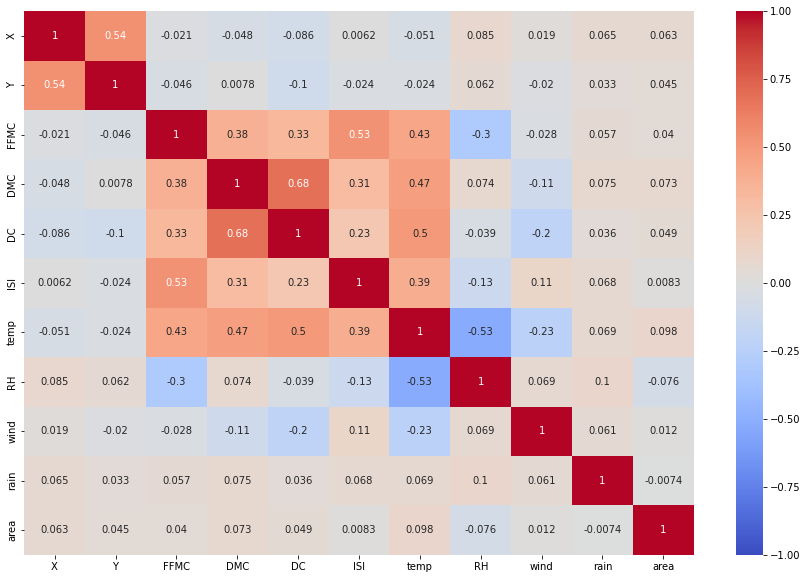

In [ ]:
plt.figure(figsize=(15, 10))
forest_fire_corr = df.drop(['month', 'day'], axis=1).corr(method='pearson')
sns.heatmap(forest_fire_corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm',
                xticklabels=forest_fire_corr.columns, yticklabels=forest_fire_corr.columns.values)

As we can see, there is a strong correlation between variables such as DMC and DC, a relatively strong negative correlation between temp and RH, but no particularly meaningful correlation with the target variable area, or so it seems. 

### 3 - Dealing with Outliers

It's important not to have any, as they can severely impact some models such as the simple linear regression.

<AxesSubplot:>

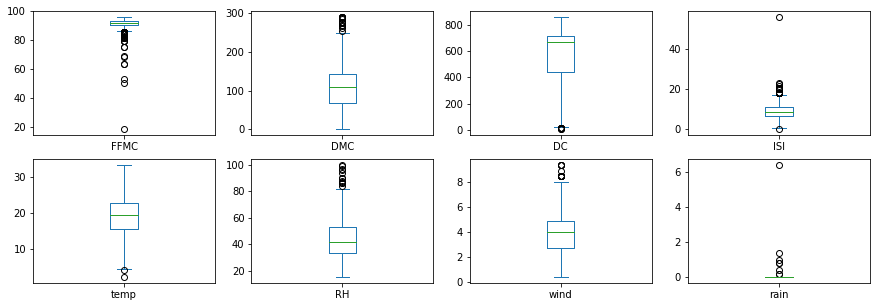

In [ ]:
# Several subplots, so that features are on their own scale
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

df['FFMC'].plot(kind='box', ax=axes[0][0])
df['DMC'].plot(kind='box', ax=axes[0][1])
df['DC'].plot(kind='box', ax=axes[0][2])
df['ISI'].plot(kind='box', ax=axes[0][3])
df['temp'].plot(kind='box', ax=axes[1][0])
df['RH'].plot(kind='box', ax=axes[1][1])
df['wind'].plot(kind='box', ax=axes[1][2])
df['rain'].plot(kind='box', ax=axes[1][3])

There are a few outliers here, which we will be handling shortly. First, let's look at the target variable for outliers.

<AxesSubplot:>

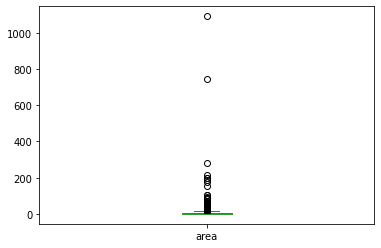

In [ ]:
df['area'].plot(kind='box')

In [ ]:
df.area.describe()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

Lots of them here, let's do something about it:

In [ ]:
# Defining a function to remove the outliers of each row and leave only those bits of data that fit the whiskers' range
def remove_outliers(df):
    for j in list(df.columns):
        vector = df.loc[:, j]
        q75 = vector.quantile(0.75)
        q25 = vector.quantile(0.25)
        IQR = q75 - q25
        vector = vector[(vector >= q25 - 1.5*IQR) & (vector <= q75 + 1.5*IQR)]
        df = df.loc[list(set(df.index).intersection(set(vector.index)))] 
    
    return df

# This is a copy so that we can later on evaluate other models without having to re-run everything and delete cells
copydf = remove_outliers(df.drop(['month', 'day'], axis=1))
copydf.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.0,270.000000
mean,4.733333,4.414815,92.168519,122.277407,653.477037,9.734815,20.723704,42.02963,3.626296,0.0,2.287556
std,2.230908,0.931762,1.575442,42.757356,114.444403,3.233705,4.135569,12.61317,1.568585,0.0,3.558100
min,1.000000,3.000000,87.500000,35.400000,232.100000,3.700000,10.100000,15.00000,0.400000,0.0,0.000000
25%,3.000000,4.000000,91.200000,94.775000,613.000000,7.200000,18.000000,33.00000,2.200000,0.0,0.000000
50%,4.000000,4.000000,92.100000,116.300000,686.700000,8.900000,20.600000,40.00000,3.600000,0.0,0.150000
75%,7.000000,5.000000,93.100000,142.400000,724.300000,11.075000,23.500000,49.75000,4.900000,0.0,3.290000
max,9.000000,6.000000,96.200000,235.100000,822.800000,20.000000,31.000000,78.00000,8.900000,0.0,16.000000
